<a href="https://colab.research.google.com/github/operationsgrupovoga/AnaliseReceita-/blob/main/analise_Receita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análise de Receita YOY por frente (PJ1 e PJ2)**

**Autor:** Júlia Félix

**Data:** 09/10/2025

**Planilhas utilizadas:**
- resultados_query_receita
- nnmYOY_22_09.xlsx - planilha: BaseNNM e 2024vs2025


### **Resumo:**
Essa análise foca em descrever a Receita do escritório e dos assessores em 2024 e 2025.

Foram considerados os meses jan-ago de 2024 e de 2025 e  só foram analisados os assessores de 24 que também estão em 25, sendo ao todo 21 assessores. Também foram analisadas, além da receita total, o quanto da receita é oriunda de PJ1  ou de PJ2 . Para PJ1 foram consideradas receitas oriundas de aai, prev e cvm e para PJ2 de pj2 btg, pj2 e internacional.

### **Resultados:**



**>> Dados de receita total:**

2024:  total de 3.917.511,45;  média de 23.318,52 /mês

2025: total de 5.702.510,96; média de 33.943,51/mês


**PJ1:**

2024: total de 3.747.773,07, média de 22.308,17/mês

2025: total de  4.194.376,52, média de 24.966,5/mês

**PJ2:**


2024: total de 169.738,37, média de 1010.35/mês

2025: total de 1.508.134,44, média de 8.976,99/mês



**>> Frente**

PJ1 é a forma de captação que mais gera receita, mas de 24 a 25 essa proporção mudou bastante, o que antes era 4.3% passou a representar 26.4% da receita total.

Isso mostra que não faz sentido calcular a meta de receita em cima apenas de captação AAI/Prev e CVM.




**>> Valores**

Em relação a valor de receita gerada 2025 foi superior a 2024 com média mensal de ~34 mil.



**>> Assessores**

Bruno Borges, Yasmin Muniz e Rejane Machado são responsáveis por ~37%
da receita gerada pelo escritório (2024 e 2025).

Olhando para os anos separadamente, temos que em 2024 esses mesmos 3 assessores eram responsáveis por 42,35% em em 2025 Bruno Borges, Rejane Machado, Pedro Andrade e Marcio Tasso foram responsáveis por 43% da receita.









Conexão ao Google Drive, que deve conter os arquivos excell que serão utilizados.

In [ ]:
#Conectar ao drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importação dos arquivos e das bibliotecas que serão utilizados.

Para análise de Receita foi usada planilha excell gerada a partir de query de Receita.

Foram usadas também as planilhas geradas para análise de NNM YOY, nas abas 'BaseNNM' e '2024vs2025' para pegar o nome do assessor a partir de seu código aai.

In [ ]:
#Importação dos dados e bibliotecas:
import pandas as pd
import matplotlib.pyplot as plt

#resultado da query de Receita:
nomes_col_receita = ['ano', 'mes', 'mes_ano', 'dias_uteis', 'codigo_aai','id_squad','r_aai', 'r_cvm', 'r_prev', 'r_pj_btg', 'r_pj2', 'r_inter', 'r_btg', 'r_total', 'meta_receita', 'desempenho' ]
receita = pd.read_csv('/content/drive/MyDrive/VOGA/resultados_query_receita.csv',sep =';',header =None, names = nomes_col_receita)

#metas assessores:
metas = pd.read_excel('/content/drive/MyDrive/VOGA/nnmYOY_22_09.xlsx',sheet_name='BaseNNM')

#nnm
df = pd.read_excel('/content/drive/MyDrive/VOGA/nnmYOY_22_09.xlsx',sheet_name='2024vs2025',header=3)

#para todos os valores numéricos em dfs não serem apresentados como potencia e terem 4 casas decimais.
pd.options.display.float_format = '{:.2f}'.format

## Limpeza e organização dos dados para manipulação:

- Ajuste dos tipos numéricos e formato dos números

- Ajuste de formato da tabela

- Filtro para conter na análise apenas os assessores que aparecem tanto em 2024 quanto em 2025.

- Seleção apenas dos meses jan-ago

- Preenchimento de falores numéricos NaN por 0

- Vínculo de código aai com o nome do assessor

- Joins de tabelas

In [ ]:
#Ajustes para usar planilha '2024vs2025'
#propagar o nome do assessor para baixo
df = df.rename(columns={"Assessor":"Assessores por Ano"})

# Cria coluna "Assessor" só com os nomes (ignora anos numéricos)
df["Assessor"] = df["Assessores por Ano"].where(~df["Assessores por Ano"].str.isnumeric())
# Preenche para baixo:
df["Assessor"] = df["Assessor"].ffill()
df["Ano"] = pd.to_numeric(df["Assessores por Ano"],errors="coerce")

df_final = df.dropna(subset=["Ano"]).copy()
df_final["Ano"] = df_final["Ano"].astype(int)
df_final = df_final.drop(columns=["Assessores por Ano"])
df_final=df_final.fillna(0)

# assessores em 2025
assessores_25 = df_final.loc[df_final['Ano'] == 2025, 'Assessor']

# filtrar df para conter apenas registros de 2024 com assessores que também aparecem em 2025
df_filtrado = df_final[(df_final['Ano'] == 2024) & (df_final['Assessor'].isin(assessores_25))]

df_final_melt = df_filtrado.melt(
    id_vars=["Assessor", "Ano"],
    var_name="Mes",
    value_name="nnm")

meses = {"jan":1, "fev":2, "mar":3, "abr":4, "mai":5, "jun":6, "jul":7, "ago":8}
df_final_melt["Mes_num"] = df_final_melt["Mes"].map(meses)
#remover linha total geral
df_final_melt=df_final_melt[df_final_melt['Mes'] != 'Total Geral']

colunas=['meta_net_new_money', 'nome_completo','ano', 'desemp','mes']
new_tb_metas = metas[colunas]

new_tb_metas['meta_net_new_money'].unique()

new_tb_metas = metas[colunas].copy()
new_tb_metas['meta_net_new_money'] = pd.to_numeric(new_tb_metas['meta_net_new_money'], errors='coerce')

df_merged = pd.merge(
    new_tb_metas,
    df_final_melt,
    left_on=["nome_completo", 'ano', "mes"],
    right_on=["Assessor", 'Ano',"Mes_num"],
    how="right")

colunas_analise = ['meta_net_new_money','nome_completo', 'mes', 'ano', 'nnm']
df_merged=df_merged[colunas_analise]

#df_merged + metas para pegar o código aai:
#metas
col_metas_join = ['ano', 'mes', 'nome_completo', 'codigo_aai', 'nnm_liq']
metas = metas[col_metas_join]

#join:
metas_nnm = pd.merge(df_merged, metas, on=['nome_completo', 'ano', 'mes'], how='left')


#Receita:

#metas e desempenho de receita: valores NaN --> 0
receita['meta_receita'] = receita['meta_receita'].fillna(0)
receita['desempenho'] = receita['desempenho'].fillna(0)

#so 24 ou 25:
receita = receita[receita['ano'].isin([2024, 2025])]

#só os assessores que estamos analisando:
#criar relação nome assessor -- código aai:
assessores_aai = metas[['codigo_aai','nome_completo']].drop_duplicates()

receita = receita[receita['codigo_aai'].isin(assessores_aai['codigo_aai'])]

receita['mes'].unique()
#vincular código aai ao nome do assessor:
receita = pd.merge(receita,assessores_aai, on='codigo_aai', how='left' )


#receita dividindo pj1 e pj2
col_receita_pj1_pj2 = ['ano', 'mes', 'codigo_aai', 'r_aai', 'r_cvm', 'r_prev','r_pj_btg', 'r_pj2', 'r_inter', 'r_total', 'meta_receita','nome_completo']
receita_pj1_pj2 = receita[col_receita_pj1_pj2]
#transformando os valores de receita em numéricos:

receita_pj1_pj2.loc[:, "r_aai"] = (receita_pj1_pj2["r_aai"].astype(str).str.replace(",", ".", regex=False).astype(float))
receita_pj1_pj2.loc[:, "r_cvm"] = (receita_pj1_pj2["r_cvm"].astype(str).str.replace(",", ".", regex=False).astype(float))
receita_pj1_pj2.loc[:, "r_prev"] = (receita_pj1_pj2["r_prev"].astype(str).str.replace(",", ".", regex=False).astype(float))
receita_pj1_pj2.loc[:, "r_pj_btg"] = (receita_pj1_pj2["r_pj_btg"].astype(str).str.replace(",", ".", regex=False).astype(float))
receita_pj1_pj2.loc[:, "r_pj2"] = (receita_pj1_pj2["r_pj2"].astype(str).str.replace(",", ".", regex=False).astype(float))
receita_pj1_pj2.loc[:, "r_inter"] = (receita_pj1_pj2["r_inter"].astype(str).str.replace(",", ".", regex=False).astype(float))
receita_pj1_pj2.loc[:, "r_total"] = (receita_pj1_pj2["r_total"].astype(str).str.replace(",", ".", regex=False).astype(float))
receita_pj1_pj2.loc[:, "meta_receita"] = (receita_pj1_pj2["meta_receita"].astype(str).str.replace(",", ".", regex=False).astype(float))

#RECEITA PJ1 E PJ2:
receita_pj1_pj2.loc[:, 'r_pj1'] = (receita_pj1_pj2['r_aai'] + receita_pj1_pj2['r_cvm'] + receita_pj1_pj2['r_prev'])
receita_pj1_pj2.loc[:, 'r_pj2'] = (receita_pj1_pj2['r_pj_btg'] + receita_pj1_pj2['r_pj2'] + receita_pj1_pj2['r_inter'])

pos_calculo = ['ano', 'mes', 'codigo_aai','r_total', 'meta_receita','nome_completo', 'r_pj1', 'r_pj2']
receita_pj1_pj2 = receita_pj1_pj2[pos_calculo]
#remover os meses depois de agosto
receita_pj1_pj2 = receita_pj1_pj2[~receita_pj1_pj2['mes'].isin([9, 10, 11, 12])]

#receita total
col_receita_join = ['ano', 'mes', 'codigo_aai', 'r_total', 'meta_receita', 'desempenho']
receita = receita[col_receita_join]


#JOIN: metas/nnm e receita vinculando pelo ano
#df_receita = pd.merge(receita,metas, left_on=['ano','mes','codigo_aai'], right_on =['ano', 'mes', 'codigo_aai'] ,how = 'right')

df_receita = receita.merge(
    metas[['ano', 'mes', 'codigo_aai', 'nnm_liq']],
    on=['ano', 'mes', 'codigo_aai'],
    how='left'
)

#tipo numérico
df_receita["r_total"] = (
    df_receita["r_total"].astype(str).str.replace(",", ".", regex=False).astype(float))

df_receita['meta_receita'] = (
    df_receita['meta_receita'].astype(str).str.replace(",", ".", regex=False).astype(float))


df_receita['nnm_liq'] = df_receita['nnm_liq'].fillna(0)

#remover os meses depois de agosto
df_receita = df_receita[~df_receita['mes'].isin([9, 10, 11, 12])]

/tmp/ipython-input-2558023075.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receita_pj1_pj2.loc[:, 'r_pj1'] = (receita_pj1_pj2['r_aai'] + receita_pj1_pj2['r_cvm'] + receita_pj1_pj2['r_prev'])


## Tabela Receita resultante pós tratamento

In [ ]:
df_receita.head()

,ano,mes,codigo_aai,r_total,meta_receita,desempenho,nnm_liq
0,2024,1,639042,0.00,0.00,0,0.00
1,2024,2,639042,807.72,0.00,0,0.00
2,2024,3,639042,16051.06,0.00,0,0.00
3,2024,4,639042,30805.57,14823.57,"2,07814729660694",15012261.14
4,2024,5,639042,65852.17,22365.44,"2,94437105406694",4871797.66


## Descrição dos dados de Receita:

In [ ]:
df_receita.describe()

,ano,mes,codigo_aai,r_total,meta_receita,nnm_liq
count,336.00,336.00,336.00,336.00,336.00,336.00
mean,2024.50,4.50,6439302.95,28631.02,22415.08,1053131.22
std,0.50,2.29,4083706.98,29915.40,23308.60,2723995.42
min,2024.00,1.00,639042.00,-21164.65,0.00,-8519542.18
25%,2024.00,2.75,5248579.00,6299.61,7204.06,0.00
50%,2024.50,4.50,5309672.00,20292.24,15099.60,372759.38
75%,2025.00,6.25,8405882.00,42370.14,32685.14,1594762.77
max,2025.00,8.00,18500906.00,165340.67,118500.93,32730407.10


## Receita média do escritório (soma de receita de cada assessor) mês a mês em 2024 e em 2025

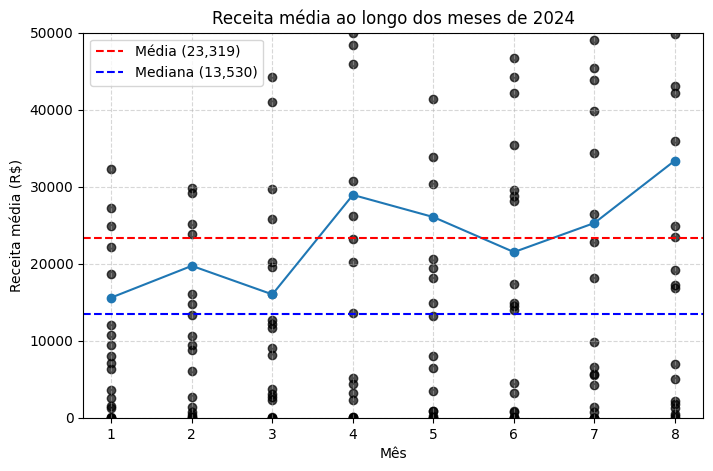

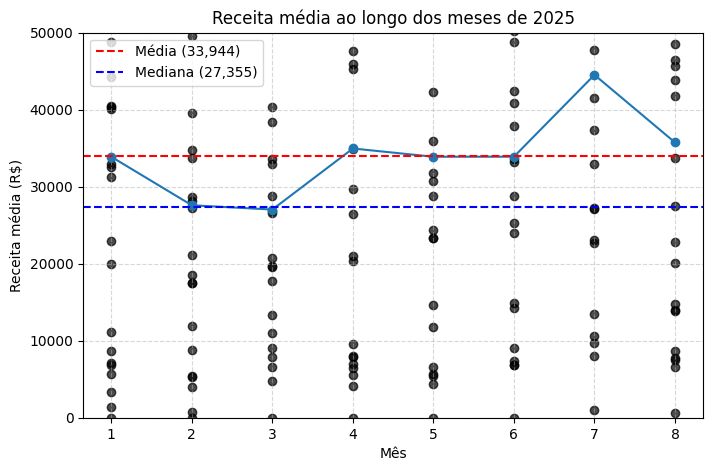

In [ ]:
#Criação de métricas de média e separação dos anos para faciltar a manipulação dos dados:

df_media_receita = df_receita.groupby(['mes','ano'])['r_total'].mean().reset_index() #receita média mes a mes
df_media_receita_24 = df_media_receita.loc[df_media_receita['ano'] == 2024]
df_media_receita_25 = df_media_receita.loc[df_media_receita['ano'] == 2025]
#receita mes a mes: 24 e 25
receita_assessor = df_receita.groupby(['mes','ano','codigo_aai'])['r_total'].sum().reset_index() #receita média mes a mes por assessor
#24
mean_24 = df_receita.loc[df_receita['ano'] == 2024, 'r_total'].mean()
median_24 = df_receita.loc[df_receita['ano'] == 2024, 'r_total'].median()
plt.figure(figsize=(8,5))
plt.plot(df_media_receita_24['mes'], df_media_receita_24['r_total'], marker='o')

#ponto representando cada assessor
plt.scatter(
    receita_assessor.loc[receita_assessor['ano'] == 2024, 'mes'],
    receita_assessor.loc[receita_assessor['ano'] == 2024, 'r_total'],
    alpha=0.7,
    color='black')

plt.axhline(y=mean_24, color="red", linestyle="--", label=f"Média ({mean_24:,.0f})")
plt.axhline(y=median_24, color="blue", linestyle="--", label=f"Mediana ({median_24:,.0f})")

plt.title('Receita média por mês - 2024')
plt.xlabel('Mês')
plt.ylim(0, 50000)
plt.ylabel('Receita média (R$)')
plt.title("Receita média ao longo dos meses de 2024")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

#25
mean_25 = df_receita.loc[df_receita['ano'] == 2025, 'r_total'].mean()
median_25 = df_receita.loc[df_receita['ano'] == 2025, 'r_total'].median()
plt.figure(figsize=(8,5))
plt.plot(df_media_receita_25['mes'], df_media_receita_25['r_total'], marker='o')

plt.axhline(y=mean_25, color="red", linestyle="--", label=f"Média ({mean_25:,.0f})")
plt.axhline(y=median_25, color="blue", linestyle="--", label=f"Mediana ({median_25:,.0f})")

#ponto representando cada assessor
plt.scatter(
    receita_assessor.loc[receita_assessor['ano'] == 2025, 'mes'],
    receita_assessor.loc[receita_assessor['ano'] == 2025, 'r_total'],
    alpha=0.7,
    color='black')

plt.title('Receita média por mês - 2025')
plt.xlabel('Mês')
plt.ylim(0, 50000)
plt.ylabel('Receita média (R$)')
plt.title("Receita média ao longo dos meses de 2025")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

## Análise de Receita por frente PJ1 e PJ2 (contribuição de cada frente na Receita total):

Temos na tabela o nome completo do assessor, sua receita total gerada, meta de receita, receita oriunda de PJ1, receita oriunda de PJ2, excedente ou faltante de receita em relação a sua meta, e quanto em % a receita do assessor representa do escritório (sua contribuição).


Os dados estão ordenados de acordo com a % que a receita do assessor em questão representa ao escritório.

A mesma análise pode ser vista para o ano de 2024, 2025 e para os dois anos conjuntos, que é o que está sendo exibido.

In [ ]:
#2024
receita_pj1_pj2_24 = receita_pj1_pj2[receita_pj1_pj2['ano'] == 2024]
receita_pj1_pj2_24 = receita_pj1_pj2_24.groupby(['ano','nome_completo'])[['r_total', 'meta_receita','r_pj1', 'r_pj2']].sum().reset_index()
receita_pj1_pj2_24['excedente ou faltante'] = receita_pj1_pj2_24['r_total'] - receita_pj1_pj2_24['meta_receita']
receita_pj1_pj2_24['% da receita total do escritorio'] = (receita_pj1_pj2_24['r_total'] / receita_pj1_pj2_24['r_total'].sum()) * 100
#2025
receita_pj1_pj2_25 = receita_pj1_pj2[receita_pj1_pj2['ano'] == 2025]
receita_pj1_pj2_25 = receita_pj1_pj2_25.groupby(['ano','nome_completo'])[['r_total', 'meta_receita','r_pj1', 'r_pj2']].sum().reset_index()
receita_pj1_pj2_25['excedente ou faltante'] = receita_pj1_pj2_25['r_total'] - receita_pj1_pj2_25['meta_receita']
receita_pj1_pj2_25['% da receita total do escritorio'] = (receita_pj1_pj2_25['r_total'] / receita_pj1_pj2_25['r_total'].sum()) * 100

#2024 e 2025:
receita_pj1_pj2_24_25 = receita_pj1_pj2.groupby(['nome_completo'])[['r_total', 'meta_receita','r_pj1', 'r_pj2']].sum().reset_index()
receita_pj1_pj2_24_25['excedente ou faltante'] = receita_pj1_pj2_24_25['r_total'] - receita_pj1_pj2_24_25['meta_receita']
receita_pj1_pj2_24_25[ '% da receita total do escritorio'] = (receita_pj1_pj2_24_25['r_total'] / receita_pj1_pj2_24_25['r_total'].sum()) * 100




receita_pj1_pj2_24.sort_values('% da receita total do escritorio', ascending=False)

,ano,nome_completo,r_total,meta_receita,r_pj1,r_pj2,excedente ou faltante,% da receita total do escritorio
2,2024,BRUNO DE CARVALHO BORGES,677070.91,599841.52,661423.96,15646.95,77229.38,17.28
20,2024,YASMIN MAIA MUNIZ XAVIER,635126.28,413040.27,593922.51,41203.77,222086.01,16.21
16,2024,REJANE MACHADO SOUZA,347056.31,273951.32,335472.61,11583.69,73104.98,8.86
17,2024,ROGERIO MAGALHAES COELHO,346991.99,158864.64,339591.50,7400.49,188127.36,8.86
13,2024,MARCIO VINICIO JADISCKE TASSO,306795.30,120457.87,305766.50,1028.80,186337.43,7.83
4,2024,GABRIEL BICALHO FONTES RAYDAN,292891.84,283514.06,290891.96,1999.88,9377.78,7.48
9,2024,LEANDRO SOARES LEMOS DE SOUSA,229493.91,98574.21,222086.81,7407.10,130919.70,5.86
15,2024,PEDRO VINICIUS PEREIRA DE ANDRADE,208496.00,118729.31,201462.56,7033.43,89766.69,5.32
3,2024,CECILIA ARCOVERDE BEZERRA PIRES,187908.03,182692.19,176484.88,11423.15,5215.84,4.80
1,2024,ANTONIO CARLOS DOS SANTOS,185559.73,113925.81,139934.84,45624.88,71633.91,4.74


## Comparação de receita total do escritório com a meta de receita total mês a mês:

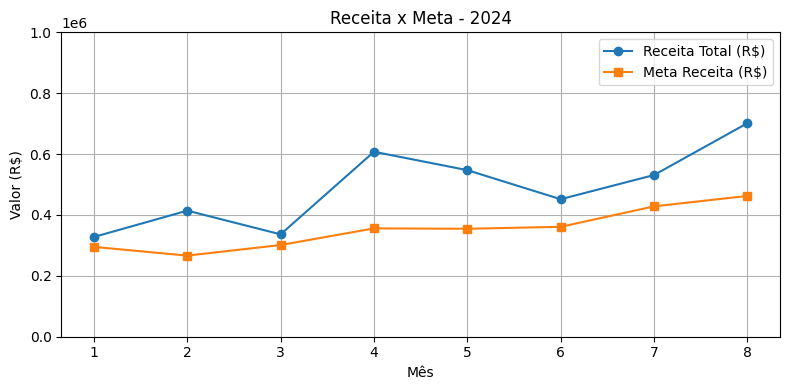

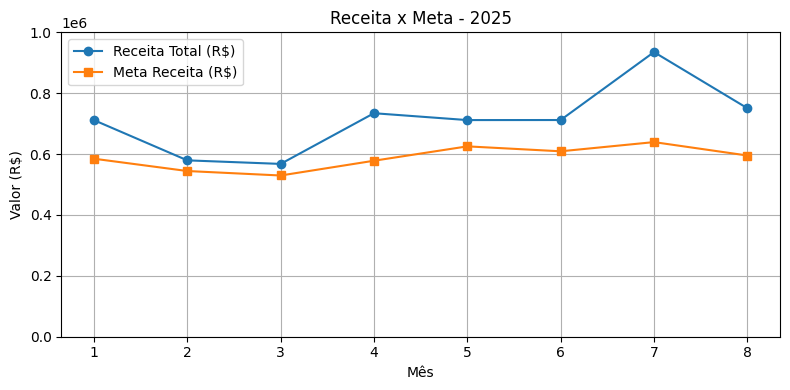

In [ ]:
#meta vs real mes a mes:
receita_pj1_pj2_total = receita_pj1_pj2.groupby(['mes', 'ano'])[['r_total', 'meta_receita']].sum()

# Garante que o índice duplo está bem definido
df = receita_pj1_pj2_total.copy()
df.index.names = ['mes', 'ano']

# Descobre os anos únicos
anos = df.index.get_level_values('ano').unique()

# Cria um gráfico separado para cada ano
for ano in anos:
    # Filtra os dados daquele ano
    df_ano = df.xs(ano, level='ano')

    # Cria o gráfico
    plt.figure(figsize=(8, 4))
    plt.plot(df_ano.index, df_ano['r_total'], marker='o', label='Receita Total (R$)')
    plt.plot(df_ano.index, df_ano['meta_receita'], marker='s', label='Meta Receita (R$)')
    plt.ylim(0,1000000)

    # Ajustes de visual
    plt.title(f"Receita x Meta - {ano}")
    plt.xlabel("Mês")
    plt.ylabel("Valor (R$)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



## Comparação da meta de receita com a receita oriunda de pj1

A partir de agora serão feitas análises mais específicas à frente de captação.
#### Gráfico: o quanto de receita é oriunda de PJ1 quando comparada ao cumprimento de meta.

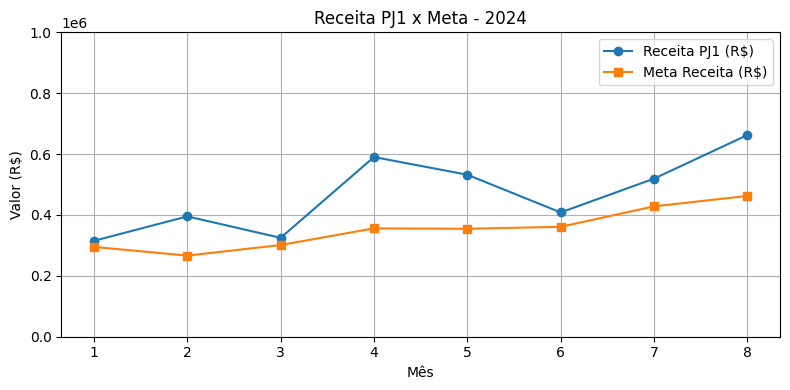

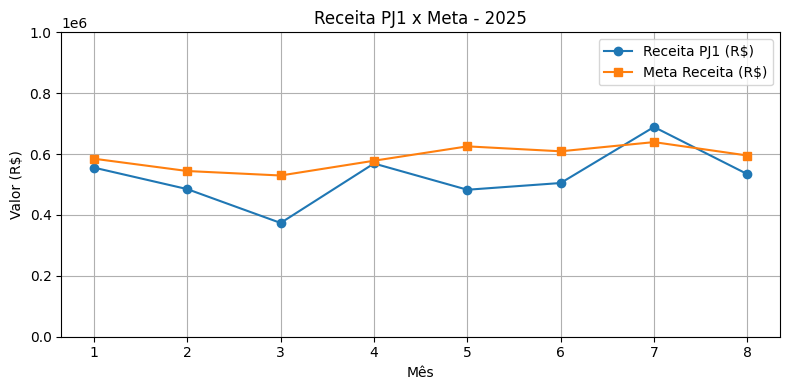

In [ ]:
#comparando a meta apenas com receita oriunda de frente pj1:

receita_pj1 = receita_pj1_pj2.groupby(['mes', 'ano'])[['r_pj1', 'meta_receita']].sum()

# Garante que o índice duplo está bem definido
df = receita_pj1.copy()
df.index.names = ['mes', 'ano']

# Descobre os anos únicos
anos = df.index.get_level_values('ano').unique()

# Cria um gráfico separado para cada ano
for ano in anos:
    # Filtra os dados daquele ano
    df_ano = df.xs(ano, level='ano')

    # Cria o gráfico
    plt.figure(figsize=(8, 4))
    plt.plot(df_ano.index, df_ano['r_pj1'], marker='o', label='Receita PJ1 (R$)')
    plt.plot(df_ano.index, df_ano['meta_receita'], marker='s', label='Meta Receita (R$)')
    plt.ylim(0,1000000)

    # Ajustes de visual
    plt.title(f"Receita PJ1 x Meta - {ano}")
    plt.xlabel("Mês")
    plt.ylabel("Valor (R$)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




Valores numéricos de receita: PJ1, PJ2, total e meta

In [ ]:
#quanto da meta veio de pj1 ou pj2:

porc_pj1_pj2 = receita_pj1_pj2.groupby(['ano'])[['r_pj1', 'r_pj2', 'r_total', 'meta_receita']].sum().reset_index()
porc_pj1_pj2

,ano,r_pj1,r_pj2,r_total,meta_receita
0,2024,3747773.07,169738.37,3917511.45,2825266.54
1,2025,4194376.52,1508134.44,5702510.96,4706198.94


## Composição de Receita:
O quanto da receita (em %) é formada a partir de receita de PJ1 e o quanto é formada a partir de receita PJ2.

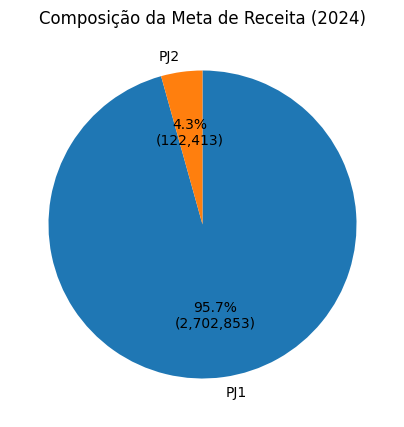

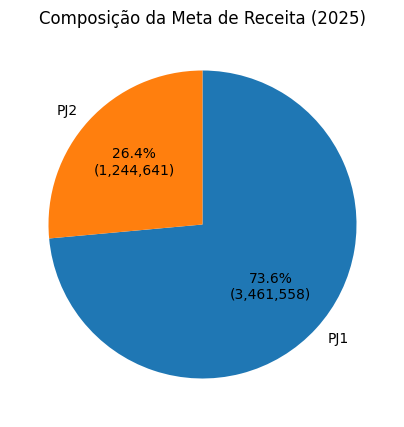

In [ ]:
for _, row in porc_pj1_pj2.iterrows():
    ano = int(row['ano'])
    pj1 = row['r_pj1']
    pj2 = row['r_pj2']
    meta = row['meta_receita']

    # Calcula faltante: caso a meta anual não tenha sido atingida
    faltante = max(0, meta - (pj1 + pj2))

    # Monta os dados e rótulos
    valores = [pj1, pj2, faltante]
    labels = ['PJ1', 'PJ2', 'Faltante'] if faltante > 0 else ['PJ1', 'PJ2']

    # Remove o valor de faltante se for zero
    if faltante == 0:
        valores = [pj1, pj2]

    # Gera o gráfico
    plt.figure(figsize=(5, 5))
    plt.pie(
        valores,
        labels=labels,
        autopct=lambda p: f'{p:.1f}%\n({p*meta/100:,.0f})',
        startangle=90,
        counterclock=False
    )

    plt.title(f"Composição da Meta de Receita ({ano})")
    plt.show()


## A receita total de cada ano e o que a receita individual de cada assessor representa do todo de 2024, de 2025 e de 2024 + 2025

In [ ]:
#receita total 24 e 25 e o que cada assessor representa disso (e total)
df_receita_soma = df_receita.groupby(['ano'])['r_total'].sum().reset_index() #receita total
df_assessor_mes = df_receita.groupby(['ano','codigo_aai'])['r_total'].sum().reset_index() #receita total - ano por assessor
df_assessor_mes = df_assessor_mes.pivot(index='codigo_aai', columns='ano', values='r_total').reset_index()

#qto cada assessor corresponde do todo:
df_assessor_mes['% do total 24'] = (df_assessor_mes[2024]/ df_receita_soma.loc[df_receita_soma['ano'] == 2024, 'r_total'].iloc[0])*100
df_assessor_mes['% do total 24'] = df_assessor_mes['% do total 24'].round(2)

df_assessor_mes['% do total 25'] = (df_assessor_mes[2025] / df_receita_soma.loc[df_receita_soma['ano'] == 2025, 'r_total'].iloc[0])*100
df_assessor_mes['% do total 25'] = df_assessor_mes['% do total 25'].round(2)


#juntando os dois anos o que cada assessor representou:
df_assessor_mes['% do total'] = ((df_assessor_mes[2024] + df_assessor_mes[2025])/df_receita_soma['r_total'].sum()) * 100
df_assessor_mes['% do total'] = df_assessor_mes['% do total'].round(2)

df_assessor_mes.sort_values("% do total", ascending=False, inplace=True)
df_assessor_mes.reset_index(drop=True, inplace=True)


df_assessor_mes

ano,codigo_aai,2024,2025,% do total 24,% do total 25,% do total
0,8405882,677070.91,947089.69,17.28,16.61,16.88
1,5309565,635126.28,330830.17,16.21,5.80,10.04
2,5248579,347056.31,593104.16,8.86,10.40,9.77
3,639042,306795.30,437152.23,7.83,7.67,7.73
4,5309523,346991.99,344033.44,8.86,6.03,7.18
5,8422840,208496.00,475622.73,5.32,8.34,7.11
6,5309249,292891.84,356560.98,7.48,6.25,6.75
7,5309672,229493.91,310712.09,5.86,5.45,5.62
8,5309791,187908.03,343884.40,4.80,6.03,5.53
9,5309803,185559.73,310480.17,4.74,5.44,5.16


## Panorama geral do escritório em Receita: 24 vs 25

Valores numéricos de receita e meta de receita do escritório:

  Ano, meta de receita, receita total, quanto do arrecadado passou ou faltou da meta, quanto da meta é cumprido por receita arrecadada por PJ1, quanto da meta é cumprida por receita arrecadada por PJ2 e o quanto da meta foi cumprida.


In [ ]:
#escritório:
#meta de receita vs cumprido > extra ou faltante
df = receita_pj1_pj2.groupby(['ano'])[['meta_receita', 'r_pj1', 'r_pj2', 'r_total']].sum().reset_index() #meta de receita total


#extra ou faltante de meta de receita:
df['extra ou faltante'] = df['r_total'] - df['meta_receita']
df['extra ou faltante'] = df['extra ou faltante'].round(2)

#meta da receita cumprida por pj1:
df['cumprimento da meta de receita por PJ1 em %'] = (df['r_pj1'] / df['meta_receita']) * 100
df['cumprimento da meta de receita por PJ2 em %'] = (df['r_pj2'] / df['meta_receita']) * 100

#meta vs receita total
df['cumprimento da meta de receita em %'] = (df['r_total'] / df['meta_receita']) * 100
df['cumprimento da meta de receita em %'] = df['cumprimento da meta de receita em %'].round(2)


cols = ['ano', 'meta_receita', 'r_total', 'extra ou faltante', 'cumprimento da meta de receita por PJ1 em %', 'cumprimento da meta de receita por PJ2 em %', 'cumprimento da meta de receita em %']
df[cols]

,ano,meta_receita,r_total,extra ou faltante,cumprimento da meta de receita por PJ1 em %,cumprimento da meta de receita por PJ2 em %,cumprimento da meta de receita em %
0,2024,2825266.54,3917511.45,1092244.90,132.65,6.01,138.66
1,2025,4706198.94,5702510.96,996312.02,89.12,32.05,121.17


Receita média mês a mês com suas composições por frente PJ1 e PJ2

total PJ1 24 ano
2024   3747773.07
2025   4194376.52
Name: r_pj1, dtype: object total PJ2 24 ano
2024    169738.37
2025   1508134.44
Name: r_pj2, dtype: object
média de PJ1 2024 22308.173050995516 média de PJ2 1010.3474567844241
total PJ1 25
média de PJ1 2025 24966.526899428052 média de PJ2 8976.990709531738


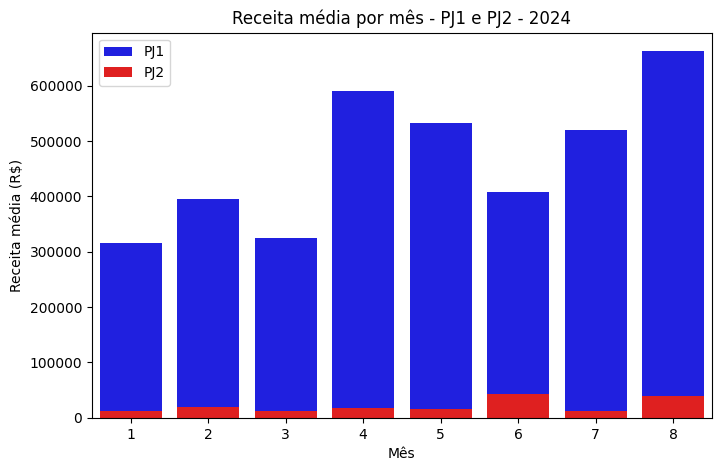

In [ ]:
#receita diferenciando PJ1 e PJ2:
#soma de receita mes a mes: 24 e 25
pj1 = receita_pj1_pj2.groupby(['mes','ano'])['r_pj1'].sum().reset_index()
pj2 = receita_pj1_pj2.groupby(['mes','ano'])['r_pj2'].sum().reset_index()
total = receita_pj1_pj2.groupby(['mes','ano'])['r_total'].sum().reset_index()
#receita anual total - 24 e 25
pj1.groupby('ano')['r_pj1'].sum() #2024 = 3.747.773,07 e 2025 = 4.194.376,52
pj2.groupby('ano')['r_pj2'].sum() #2024 = 169.738,37 e 2025 = 1.508.134,44

#separando os anos
pj1_24 = pj1.loc[pj1['ano'] == 2024]
pj2_24 = pj2.loc[pj2['ano'] == 2024]

pj1_25 = pj1.loc[pj1['ano'] == 2025]
pj2_25 = pj2.loc[pj2['ano'] == 2025]

#média de receita pj1 e pj2 do escritório:
#24
pj1_24_m = receita_pj1_pj2.loc[receita_pj1_pj2['ano'] == 2024, 'r_pj1'].mean() # 22308.2
pj2_24_m = receita_pj1_pj2.loc[receita_pj1_pj2['ano'] == 2024, 'r_pj2'].mean() #1010.4

#25
pj1_25_m = receita_pj1_pj2.loc[receita_pj1_pj2['ano'] == 2025, 'r_pj1'].mean() #24966.5
pj2_25_m = receita_pj1_pj2.loc[receita_pj1_pj2['ano'] == 2025, 'r_pj2'].mean() #8976.99


#total:
total.groupby('ano')['r_total'].sum()
receita_pj1_pj2.loc[receita_pj1_pj2['ano'] == 2024, 'r_total'].mean()
receita_pj1_pj2.loc[receita_pj1_pj2['ano'] == 2025, 'r_total'].mean()
#gráfico comparando pj1 e pj2 mes a mes:
#2024
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(pj1_24, x='mes', y='r_pj1', color='blue', label='PJ1') #pj1
sns.barplot(pj2_24, x='mes', y='r_pj2', color='red', label='PJ2') #pj2
plt.title('Receita média por mês - PJ1 e PJ2 - 2024')
plt.xlabel('Mês')
plt.ylabel('Receita média (R$)')
plt

print('total PJ1 24', pj1.groupby('ano')['r_pj1'].sum() , 'total PJ2 24',pj2.groupby('ano')['r_pj2'].sum() )
print('média de PJ1 2024',pj1_24_m, 'média de PJ2',pj2_24_m)

print('total PJ1 25')
print('média de PJ1 2025', pj1_25_m, 'média de PJ2',pj2_25_m)